# Data Skills Lab

Materials:

- Download the January 2023 Yellow Taxi Data PARQUET file https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- Download the Taxi Zone Lookup table CSV file on the same page
- Read the Yellow Taxi data dictionary https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

*Assignment:*

Use pandas to read the 2 data files into your Python notebook. Answer the following questions and upload your results here:

Tips: there are 3 airports, JFK, LaGuardia, and Newark (EWR)

1. Answer the following questions:

- How many pickups happened at each airport?
- How many dropoffs happened at each airport?
- What is the total amount of airport fees collected at each NYC airport? (JFK and LaGuardia)
- What borough destination had the most tips?
- What were the top 10 pickup locations by number of passengers?

2. Create a data visualization of your choice

In [190]:
import pandas as pd
import seaborn as sns

In [194]:
# taxi_link = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"

trips = pd.read_parquet("/Users/sam/Documents/projects/ds course/yellow_tripdata_2023-01.parquet")
taxi_zones = pd.read_csv("/Users/sam/Documents/projects/ds course/taxi_zone_lookup.csv")

In [195]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [196]:
trips["pickup_day"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day)
trips["pickup_dow"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day_name())
trips["pickup_dow_num"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day_of_week)

In [197]:
taxi_zones.head()
airport_list = [1, 132, 138]
airport_zones = taxi_zones.query("LocationID in @airport_list")

In [198]:
# rows before 3066766
trips_merged_pu = (
    trips.merge(
        taxi_zones,
        left_on=["PULocationID"],
        right_on=["LocationID"],
        how="inner")
)

In [200]:
trips_merged_pu.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow,pickup_dow_num,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,14.30,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
1,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,...,27.80,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
2,1,2023-01-01 00:52:06,2023-01-01 01:02:18,2.0,1.70,1.0,N,161,164,4,...,16.40,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
3,2,2023-01-01 00:19:12,2023-01-01 00:38:27,1.0,5.70,1.0,N,161,87,1,...,38.16,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone
4,2,2023-01-01 00:18:08,2023-01-01 00:32:43,1.0,2.17,1.0,N,161,107,2,...,19.20,2.5,0.0,1,Sunday,6,161,Manhattan,Midtown Center,Yellow Zone


In [201]:
trips_merged_pu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3066766 entries, 0 to 3066765
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [216]:
# How many pickups happened at each airport?
result_1 = trips_merged_pu.query("PULocationID in @airport_list").groupby(["Zone"]).agg({"Zone": "count", "passenger_count": "sum"})
result_1.columns = ['pickup_count', 'passenger_count']
result_1.reset_index(inplace=True)

In [218]:
result_1

,Zone,pickup_count,passenger_count
0,JFK Airport,160030,228407.0
1,LaGuardia Airport,89188,119617.0
2,Newark Airport,410,648.0


<AxesSubplot: xlabel='Zone', ylabel='pickup_count'>

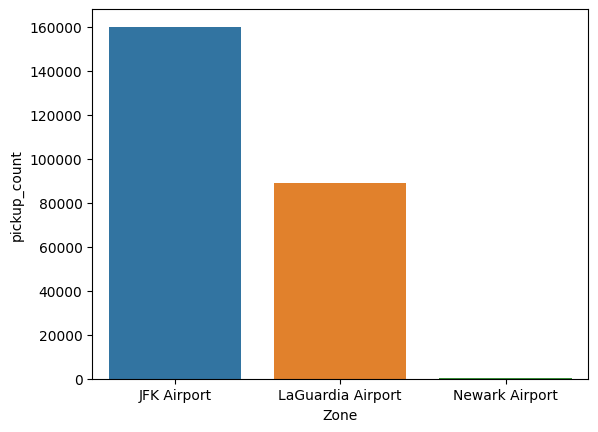

In [219]:
sns.barplot(result_1, x="Zone", y="pickup_count")

In [220]:
# rows before 3066766
trips_merged_do = (
    trips.merge(
        taxi_zones.query("LocationID in @airport_list"),
        left_on=["DOLocationID"],
        right_on=["LocationID"],
        how="inner")
)

In [221]:
trips_merged_do.shape

(72747, 26)

In [223]:
result_2 = trips_merged_do.groupby(["Zone"]).agg({"Zone": "count", "passenger_count": "sum"})
result_2.columns = ['dropoff_count', 'passenger_count']
result_2.reset_index(inplace=True)

In [224]:
result_2

,Zone,dropoff_count,passenger_count
0,JFK Airport,33190,49805.0
1,LaGuardia Airport,32031,42552.0
2,Newark Airport,7526,12156.0


<AxesSubplot: xlabel='Zone', ylabel='dropoff_count'>

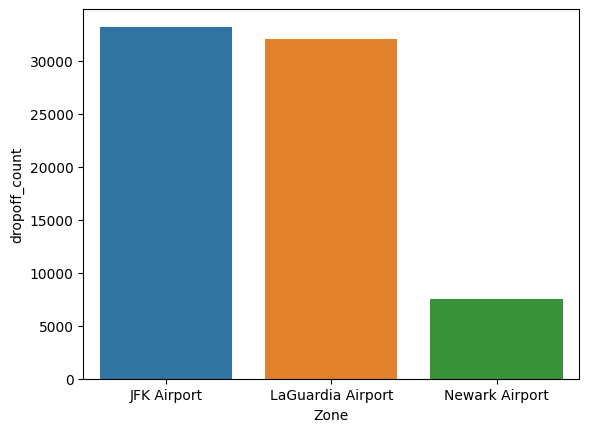

In [225]:
sns.barplot(result_2, x="Zone", y="dropoff_count")

In [229]:
# - What is the total amount of airport fees collected at each NYC airport? (JFK and LaGuardia)
result_3 = trips.query("PULocationID in @airport_list").groupby("PULocationID").agg({"airport_fee": "sum", "PULocationID": "count"})
result_3.columns = ['airport_fee_sum', 'pickup_count']
result_3.reset_index(inplace=True)


In [235]:
# dropping bad EWR airport row
result_3.drop(0, axis=0, inplace=True)

In [239]:
result_3 = result_3.merge(taxi_zones, left_on="PULocationID", right_on="LocationID", how="inner")

In [231]:
trips.query("PULocationID == 1 and airport_fee > 0")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow,pickup_dow_num
261195,2,2023-01-04 14:49:22,2023-01-04 14:49:42,2.0,0.0,5.0,N,1,1,1,...,0.0,40.69,11.75,1.0,204.69,0.0,1.25,4,Wednesday,2
2559949,2,2023-01-27 15:15:51,2023-01-27 15:19:06,1.0,0.0,5.0,N,1,1,2,...,0.0,0.00,0.00,1.0,127.25,0.0,1.25,27,Friday,4


<AxesSubplot: xlabel='Zone', ylabel='airport_fee_sum'>

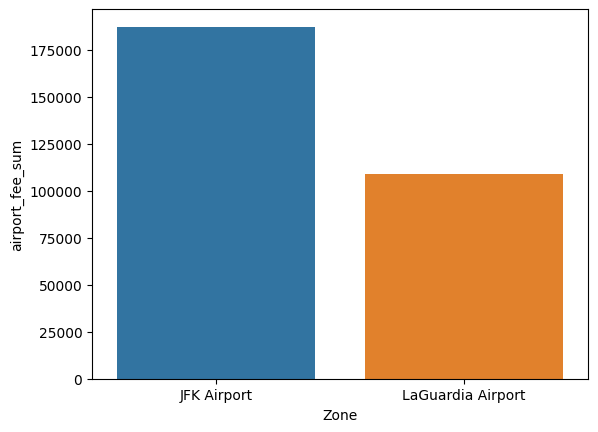

In [240]:
sns.barplot(result_3, x="Zone", y="airport_fee_sum")

In [241]:
# what borough destination had the most tips?

trips_merged_do_all = (
    trips.merge(
        taxi_zones,
        left_on=["DOLocationID"],
        right_on=["LocationID"],
        how="left")
)

borough_metrics = trips_merged_do_all.groupby("Borough").sum().reset_index()
#.agg({"tip_amount": ["sum", "mean"] , "DOLocationID": "count", "trip_distance": "mean"}).reset_index()

/var/folders/pf/fv0ly2656kjc4_pqx05d4qbw0000gn/T/ipykernel_51234/949310028.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_metrics = trips_merged_do_all.groupby("Borough").sum().reset_index()


In [242]:
borough_metrics.head()

,Borough,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_day,pickup_dow_num,LocationID
0,Bronx,30442,22696.0,189224.49,217263.0,2739403,2988062,26904,784301.69,28165.75,8659.9,61818.26,49254.30,17524.9,967828.35,16192.5,6772.50,281227,53921,2988062
1,Brooklyn,206627,152627.0,1077471.05,491880.0,17258445,13535697,141500,4647685.73,203594.31,58033.7,704746.40,65756.02,116810.4,5956532.96,151100.0,50823.75,1911297,377589,13535697
2,EWR,13348,12156.0,134605.79,23351.0,1169895,7526,8956,698505.23,3071.25,162.6,108362.21,121615.20,7383.0,940527.64,635.0,641.25,110472,22800,7526
3,Manhattan,4713054,3628862.0,8693405.45,3119279.0,457133989,456931013,3212178,42658159.23,4064664.40,1341203.3,8382541.67,934627.96,2684539.8,65032485.21,6403765.0,186642.50,44917780,8171365,456931013
4,Queens,283519,216473.0,1423686.32,533462.0,24929558,21709185,228427,5980737.24,370911.89,75140.4,873584.81,338225.05,152747.0,8001143.49,194415.0,67597.50,2540383,483119,21709185


In [245]:
borough_metrics[["Borough", "tip_amount"]]

,Borough,tip_amount
0,Bronx,61818.26
1,Brooklyn,704746.40
2,EWR,108362.21
3,Manhattan,8382541.67
4,Queens,873584.81
5,Staten Island,5859.28
6,Unknown,191773.31


<AxesSubplot: xlabel='Borough', ylabel='tip_amount'>

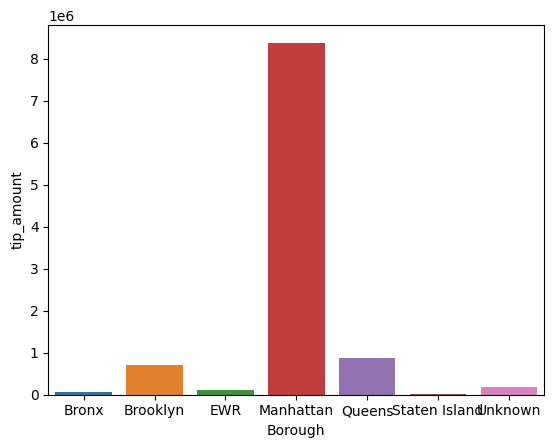

In [244]:
sns.barplot(borough_metrics, x="Borough",y="tip_amount")

In [ ]:
trips_merged_pu.head()

In [ ]:
sns.boxplot(trips_merged_pu.query("tip_amount < 30 and tip_amount >= 0"), x="Borough", y="tip_amount")

In [ ]:
sns.histplot(trips_merged_pu.query("tip_amount < 30 and tip_amount > 0 and Borough == 'Bronx'"), x="tip_amount", binwidth=0.5)

In [249]:
# - What were the top 10 pickup locations by number of passengers?
result_5 = pd.DataFrame(
    trips_merged_pu.groupby("Zone").sum()["passenger_count"].sort_values(ascending=False)[0:10]).reset_index()

/var/folders/pf/fv0ly2656kjc4_pqx05d4qbw0000gn/T/ipykernel_51234/1626238476.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trips_merged_pu.groupby("Zone").sum()["passenger_count"].sort_values(ascending=False)[0:10]).reset_index()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'JFK Airport'),
  Text(1, 0, 'Upper East Side South'),
  Text(2, 0, 'Midtown Center'),
  Text(3, 0, 'Upper East Side North'),
  Text(4, 0, 'Penn Station/Madison Sq West'),
  Text(5, 0, 'Times Sq/Theatre District'),
  Text(6, 0, 'Midtown East'),
  Text(7, 0, 'Lincoln Square East'),
  Text(8, 0, 'LaGuardia Airport'),
  Text(9, 0, 'Upper West Side South')])

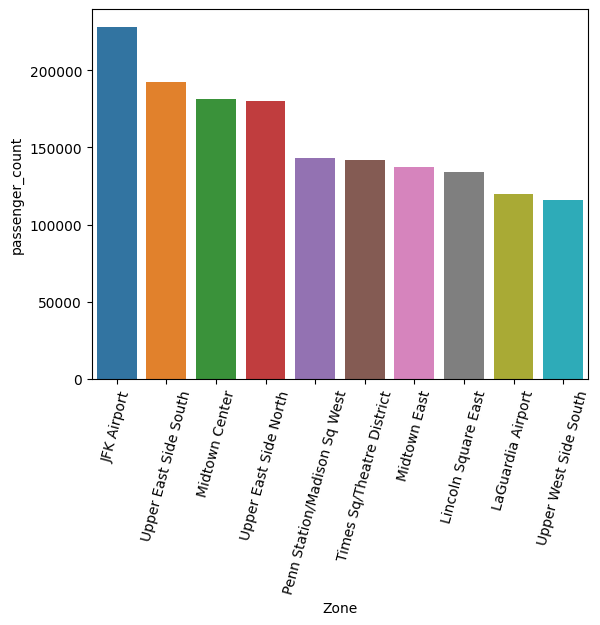

In [254]:
import matplotlib.pyplot as plt
sns.barplot(result_5, x="Zone", y="passenger_count")
plt.xticks(rotation=75)

In [ ]:
dow_metrics = trips_merged_pu.groupby(["Borough", "pickup_dow", "pickup_dow_num"]).sum()[["passenger_count", "fare_amount"]].reset_index().sort_values("pickup_dow_num")

In [ ]:
dow_metrics

In [ ]:
sns.barplot(dow_metrics, x="pickup_dow", y="fare_amount")

In [ ]:
sns.histplot(trips_merged_do, x="passenger_count", binwidth=1, hue="payment_type")

In [ ]:
sns.barplot(trip)